In [ ]:
# –§–∏–Ω–∞–ª—å–Ω–∞—è —Ä–∞–±–æ—Ç–∞ - Superstore Sales Dataset
# –ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö —Ä–æ–∑–Ω–∏—á–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Å—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç–∞ –∑–∞ 4 –≥–æ–¥–∞

In [ ]:
"""
1. –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏
2. –í–∏–∑—É–∞–ª–∏–∑–∏–∑–∞—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, —Ç—Ä–µ–Ω–¥—ã
3. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
4. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ACF –∏ PACF
5. –ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ –Ω–∞ –≥–æ–¥ —Å –ø–æ–º–æ—â—å—é ARIMA, SARIMA, ETS, LSTM, GRU
6. –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ
7. –ì—Ä–∞—Ñ–∏–∫–∏ –æ—à–∏–±–æ–∫ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
8. –í—ã–≤–æ–¥—ã
"""

In [82]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# –†–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä—É–µ–º —Å–∫–∞—á–∞–Ω–Ω—ã–π –∞—Ä—Ö–∏–≤
! unzip /content/archive.zip

Archive:  /content/archive.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [83]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
path = '/content/train.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

In [84]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'Order Date' –≤ datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º 'Order Date' –∫–∞–∫ –∏–Ω–¥–µ–∫—Å
df.set_index('Order Date', inplace=True)

# –ü—Ä–æ–≤–µ—Ä–∏–º –ø–µ—Ä–≤—ã–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫
print(df.head())

            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2017-08-11       1  CA-2017-152156  11/11/2017    Second Class    CG-12520   
2017-08-11       2  CA-2017-152156  11/11/2017    Second Class    CG-12520   
2017-12-06       3  CA-2017-138688  16/06/2017    Second Class    DV-13045   
2016-11-10       4  US-2016-108966  18/10/2016  Standard Class    SO-20335   
2016-11-10       5  US-2016-108966  18/10/2016  Standard Class    SO-20335   

              Customer Name    Segment        Country             City  \
Order Date                                                               
2017-08-11      Claire Gute   Consumer  United States        Henderson   
2017-08-11      Claire Gute   Consumer  United States        Henderson   
2017-12-06  Darrin Van Huff  Corporate  United States      Los Angeles   
2016-11-10   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
2016-11-1

In [85]:
# –í—ã–≤–æ–¥–∏–º –±–∞–∑–æ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
print("–§–æ—Ä–º–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞:", df.shape)
print("\n–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:")
print(df.dtypes)
print("\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
print(df.isnull().sum())

–§–æ—Ä–º–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞: (9800, 17)

–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:
Row ID             int64
Order ID          object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [86]:
# –í—ã–≤–æ–¥–∏–º —Ñ–æ—Ä–º—É, —Ç–∏–ø—ã –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –≤–∏–¥–µ —Ç–∞–±–ª–∏—Ü—ã
info_table = pd.DataFrame({
    '–°—Ç–æ–ª–±–µ—Ü': df.columns,
    '–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö': df.dtypes,
    '–ü—Ä–æ–ø—É—â–µ–Ω–æ': df.isnull().sum(),
    '–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö': (df.isnull().sum() / len(df) * 100).round(2),
    '–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è': [df[col].nunique() for col in df.columns]
})

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ç–∞–±–ª–∏—Ü—É
info_table.reset_index(drop=True, inplace=True)
display(info_table)

–°—Ç–æ–ª–±–µ—Ü –¢–∏–ø –¥–∞–Ω–Ω—ã—Ö  –ü—Ä–æ–ø—É—â–µ–Ω–æ  –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö  \
0          Row ID      int64          0                 0.00   
1        Order ID     object          0                 0.00   
2       Ship Date     object          0                 0.00   
3       Ship Mode     object          0                 0.00   
4     Customer ID     object          0                 0.00   
5   Customer Name     object          0                 0.00   
6         Segment     object          0                 0.00   
7         Country     object          0                 0.00   
8            City     object          0                 0.00   
9           State     object          0                 0.00   
10    Postal Code    float64         11                 0.11   
11         Region     object          0                 0.00   
12     Product ID     object          0                 0.00   
13       Category     object          0                 0.00   
14   Sub-Category     object          0                 0.00   
15   Product Name     object          0                 0.00   
16          Sales    float64          0                 0.00   

    –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è  
0                  9800  
1                  4922  
2                  1326  
3                     4  
4                   793  
5                   793  
6                     3  
7                     1  
8                   529  
9                    49  
10                  626  
11                    4  
12                 1861  
13                    3  
14                   17  
15                 1849  
16                 5757

In [87]:
# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ 'Postal Code' –º–µ–¥–∏–∞–Ω–æ–π –ø–æ –≥–æ—Ä–æ–¥—É
df['Postal Code'] = df.groupby('City')['Postal Code'].transform(lambda x: x.fillna(x.median()))

# –ï—Å–ª–∏ –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ –≤—Å—ë –µ—â—ë –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ ‚Äî –∑–∞–ø–æ–ª–Ω—è–µ–º –æ–±—â–µ–π –º–µ–¥–∏–∞–Ω–æ–π
df['Postal Code'].fillna(df['Postal Code'].median(), inplace=True)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print("\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
print(df.isnull().sum())


–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [88]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ LabelEncoder
# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞, —á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
df_encoded = df.copy()

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—Ç–∏–ø object)
cat_columns = df_encoded.select_dtypes(include='object').columns

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–∂–¥—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤ —á–∏—Å–ª–æ–≤–æ–π
le = LabelEncoder()
for col in cat_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(df_encoded[cat_columns].head())

            Order ID  Ship Date  Ship Mode  Customer ID  Customer Name  \
Order Date                                                               
2017-08-11      2456        476          2          143            166   
2017-08-11      2456        476          2          143            166   
2017-12-06      2254        673          2          237            201   
2016-11-10      4295        774          3          705            687   
2016-11-10      4295        774          3          705            687   

            Segment  Country  City  State  Region  Product ID  Category  \
Order Date                                                                
2017-08-11        0        0   194     15       2          12         0   
2017-08-11        0        0   194     15       2          55         0   
2017-12-06        1        0   265      3       3         946         1   
2016-11-10        0        0   153      8       2         319         0   
2016-11-10        0        0   

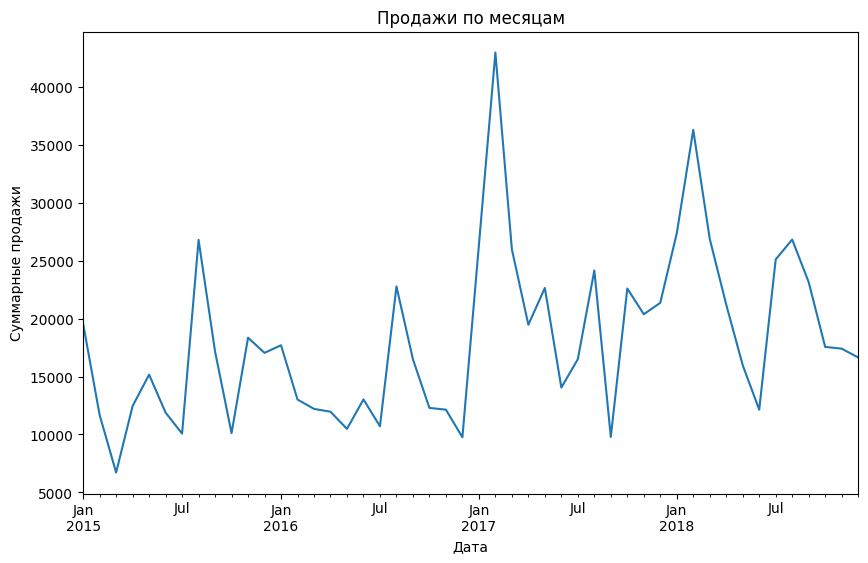

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –æ–±—â–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏
plt.figure(figsize=(10, 6))
df['Sales'].resample('M').sum().plot()  # –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–∂–µ–º–µ—Å—è—á–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏
plt.title('–ü—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏')
plt.show()

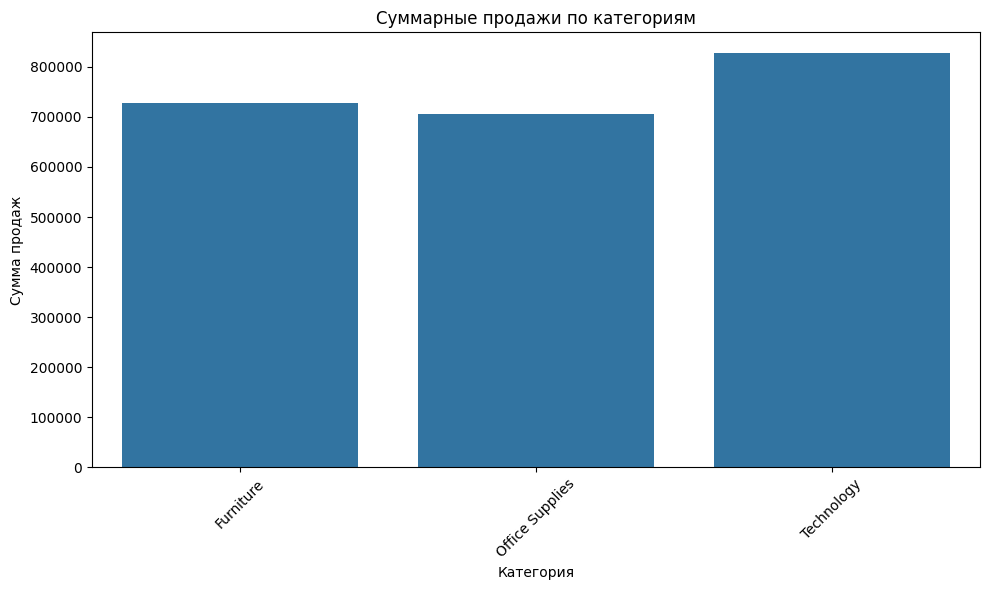

In [ ]:
# –ü—Ä–æ–¥–∞–∂–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)
plt.title('–°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

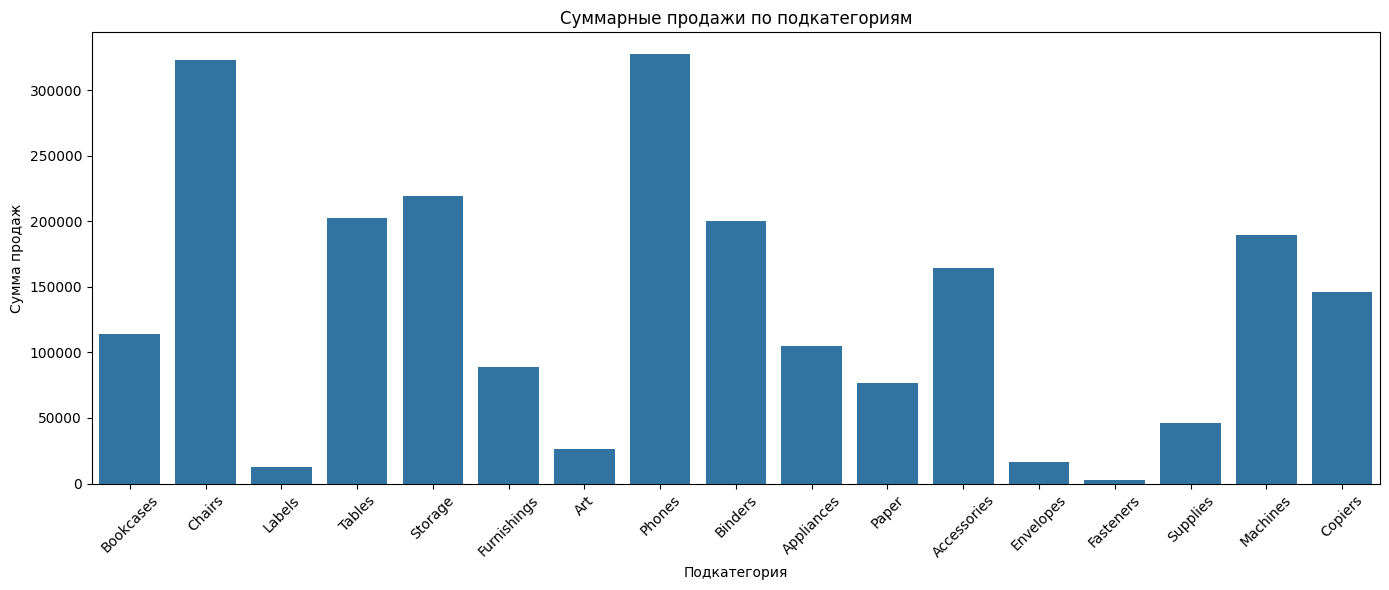

In [ ]:
# –ü—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None)
plt.title('–°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è–º')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–ü–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

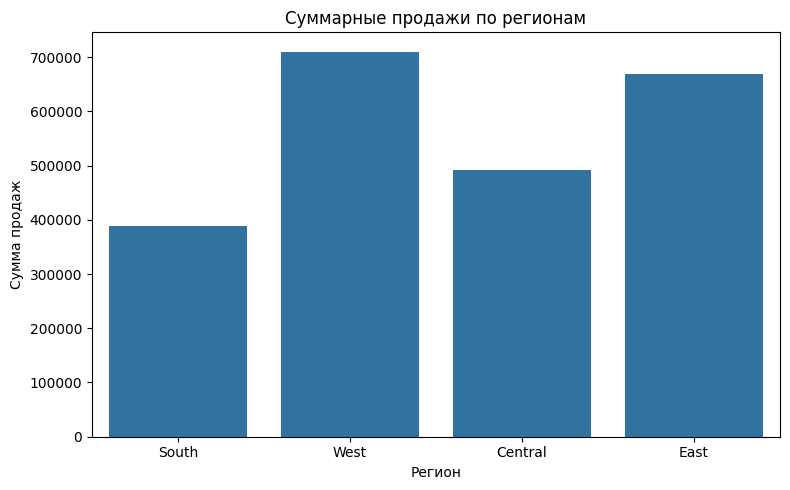

In [ ]:
# –ü—Ä–æ–¥–∞–∂–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, ci=None)
plt.title('–°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–†–µ–≥–∏–æ–Ω')
plt.tight_layout()
plt.show()

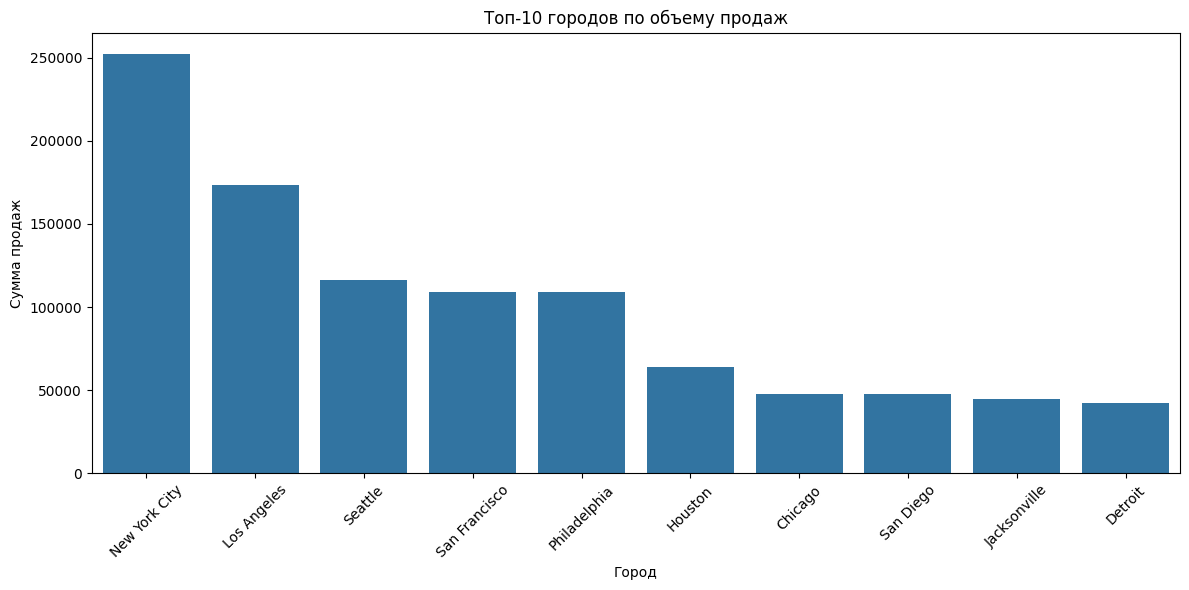

In [ ]:
# –¢–æ–ø-10 –≥–æ—Ä–æ–¥–æ–≤ –ø–æ –æ–±—ä–µ–º—É –ø—Ä–æ–¥–∞–∂
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('–¢–æ–ø-10 –≥–æ—Ä–æ–¥–æ–≤ –ø–æ –æ–±—ä–µ–º—É –ø—Ä–æ–¥–∞–∂')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–ì–æ—Ä–æ–¥')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

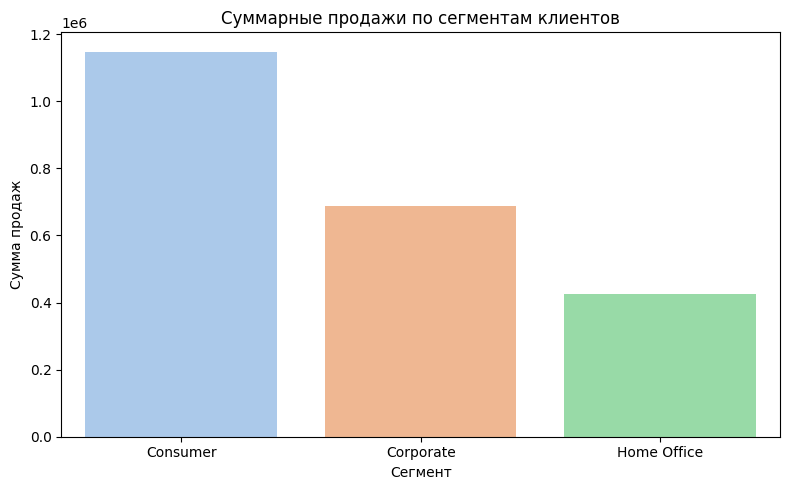

In [ ]:
# –°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∫–ª–∏–µ–Ω—Ç–æ–≤
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, ci=None, palette='pastel')
plt.title('–°—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–°–µ–≥–º–µ–Ω—Ç')
plt.tight_layout()
plt.show()

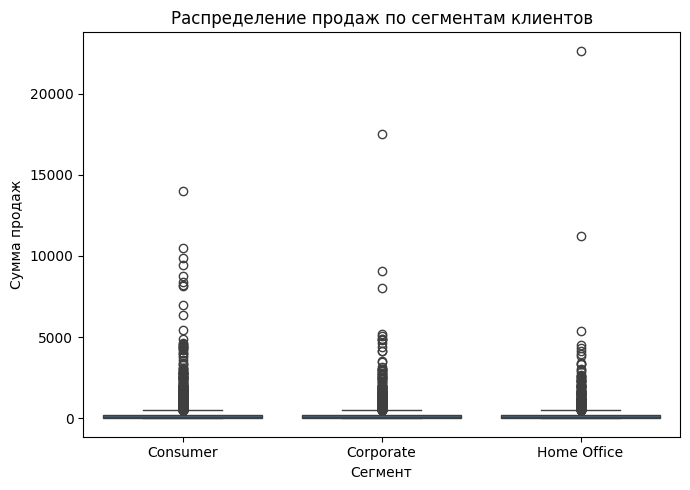

In [ ]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∫–ª–∏–µ–Ω—Ç–æ–≤ - –≤—ã–±—Ä–æ—Å—ã
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Segment', y='Sales')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.ylabel('–°—É–º–º–∞ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–°–µ–≥–º–µ–Ω—Ç')
plt.tight_layout()
plt.show()

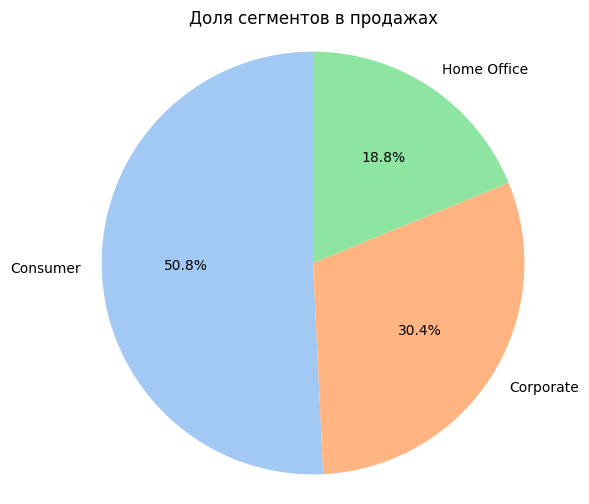

In [ ]:
# –î–æ–ª—è –ø—Ä–æ–¥–∞–∂ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∫–ª–∏–µ–Ω—Ç–æ–≤
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('–î–æ–ª—è —Å–µ–≥–º–µ–Ω—Ç–æ–≤ –≤ –ø—Ä–æ–¥–∞–∂–∞—Ö')
plt.axis('equal')
plt.show()

In [90]:
# –ü—Ä–æ–≤–æ–¥–∏–º –æ—Ü–µ–Ω–∫—É –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏

<Figure size 1200x600 with 0 Axes>

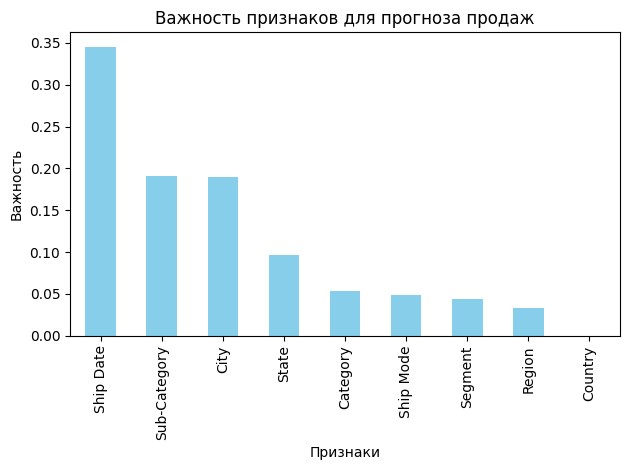

Feature  Importance
0     Ship Date    0.345318
8  Sub-Category    0.190819
4          City    0.189521
5         State    0.096099
7      Category    0.053195
1     Ship Mode    0.048519
2       Segment    0.043801
6        Region    0.032728
3       Country    0.000000

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –∏ –æ—á–∏—â–∞–µ–º –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
df_work = df.copy()
df_work.drop(columns=['Row ID', 'Postal Code', 'Order ID', 'Customer ID',
                      'Customer Name', 'Product Name', 'Product ID'], inplace=True)

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
label_encoders = {}
for column in df_work.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_work[column] = le.fit_transform(df_work[column])
    label_encoders[column] = le

# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X = df_work.drop(columns='Sales')
y = df_work['Sales']

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å Random Forest –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importance_table = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(12,6))
importance_table.plot(kind='bar', x='Feature', y='Importance', legend=False, color='skyblue')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –ø—Ä–æ–¥–∞–∂')
plt.ylabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
importance_table

In [ ]:
"""–í–´–í–û–î: –ì–æ—Ä–æ–¥ ‚Äî –≤–∞–∂–Ω–µ–π—à–∏–π —Ñ–∞–∫—Ç–æ—Ä, –ª–æ–≥–∏—á–Ω–æ: —Å–ø—Ä–æ—Å –º–æ–∂–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –Ω–∞—Å–µ–ª—ë–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞.
Sub-Category	0.23	–ü–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞ —Ç–æ–∂–µ –≤–ª–∏—è–µ—Ç ‚Äî —Ä–∞–∑–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã –ø—Ä–æ–¥–∞—é—Ç—Å—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É.
State	0.16	–®—Ç–∞—Ç –∏–º–µ–µ—Ç –≤–ª–∏—è–Ω–∏–µ ‚Äî –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –≤—ã–≤–æ–¥ –ø–æ –≥–æ—Ä–æ–¥–∞–º.
Ship Mode	0.11	–°–ø–æ—Å–æ–± –¥–æ—Å—Ç–∞–≤–∫–∏ ‚Äî –≤–ª–∏—è–µ—Ç, –Ω–æ –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ.
Segment	0.09	–°–µ–≥–º–µ–Ω—Ç –∫–ª–∏–µ–Ω—Ç–∞ ‚Äî –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏, –Ω–æ —É–º–µ—Ä–µ–Ω–Ω–æ.
Category	0.06	–ö–∞—Ç–µ–≥–æ—Ä–∏—è ‚Äî —Å–ª–∞–±–µ–µ, —á–µ–º –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è.
Region	0.05	–†–µ–≥–∏–æ–Ω ‚Äî —Å–ª–∞–±–æ –≤–ª–∏—è–µ—Ç.
Country	0.00	–ù–µ –≤–ª–∏—è–µ—Ç ‚Äî –æ—á–µ–≤–∏–¥–Ω–æ, –≤—Å–µ –ø—Ä–æ–¥–∞–∂–∏ –≤ –æ–¥–Ω–æ–π —Å—Ç—Ä–∞–Ω–µ"""

In [92]:
# –£–¥–∞–ª—è–µ–º –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ 'Country' –∏ 'Region'
df_work = df_work.drop(columns=['Country', 'Region'])

# –ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
df_work.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2017-08-11 to 2016-12-01
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Date     9800 non-null   int64  
 1   Ship Mode     9800 non-null   int64  
 2   Segment       9800 non-null   int64  
 3   City          9800 non-null   int64  
 4   State         9800 non-null   int64  
 5   Category      9800 non-null   int64  
 6   Sub-Category  9800 non-null   int64  
 7   Sales         9800 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 689.1 KB


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ (ADF):
Test Statistic     : -98.3356
p-value            : 0.0000
Lags Used          : 0
Number of Observations: 9799
Critical Values:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

‚úÖ –†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (–æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É).


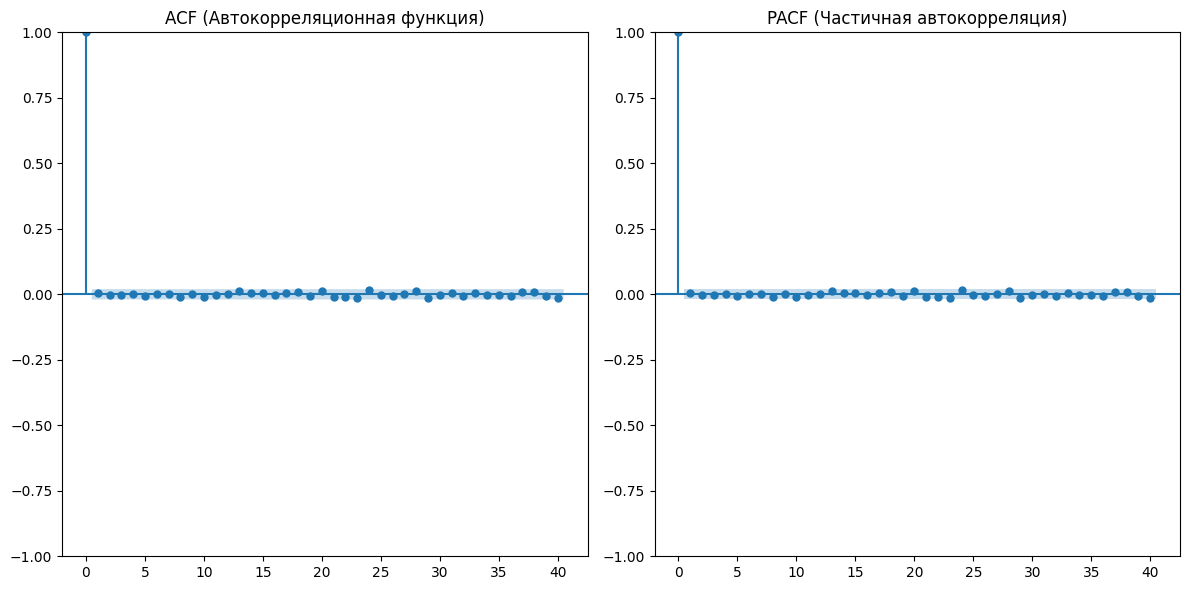

In [94]:
# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞ "Sales"
adf_result = adfuller(df_work['Sales'])

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ ADF-—Ç–µ—Å—Ç–∞
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ (ADF):")
print(f"Test Statistic     : {adf_result[0]:.4f}")
print(f"p-value            : {adf_result[1]:.4f}")
print(f"Lags Used          : {adf_result[2]}")
print(f"Number of Observations: {adf_result[3]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
if adf_result[1] < 0.05:
    print("\n‚úÖ –†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (–æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É).")
else:
    print("\n‚ö†Ô∏è –†—è–¥ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º (–Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É).")

# –ì—Ä–∞—Ñ–∏–∫–∏ ACF –∏ PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_work['Sales'], lags=40, ax=plt.gca())
plt.title("ACF (–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è)")

plt.subplot(1, 2, 2)
plot_pacf(df_work['Sales'], lags=40, ax=plt.gca())
plt.title("PACF (–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)")

plt.tight_layout()
plt.show()

In [132]:
# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∏–Ω–¥–µ–∫—Å ‚Äî —ç—Ç–æ Order Date –∏ –æ–Ω –≤ —Ñ–æ—Ä–º–∞—Ç–µ datetime
df.index = pd.to_datetime(df.index)

# –ê–≥—Ä–µ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –º–µ—Å—è—Ü—É (–µ—Å–ª–∏ –Ω—É–∂–Ω–æ)
monthly_sales = df['Sales'].resample('M').sum()

# –î–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ train –∏ test
train = monthly_sales[:-12]
test = monthly_sales[-12:]

In [133]:
# –ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ –Ω–∞ 12 –º–µ—Å—è—Ü–µ–≤

üîπARIMA:
MAE: 5628.59, RMSE: 6916.30, MAPE: 24.67%


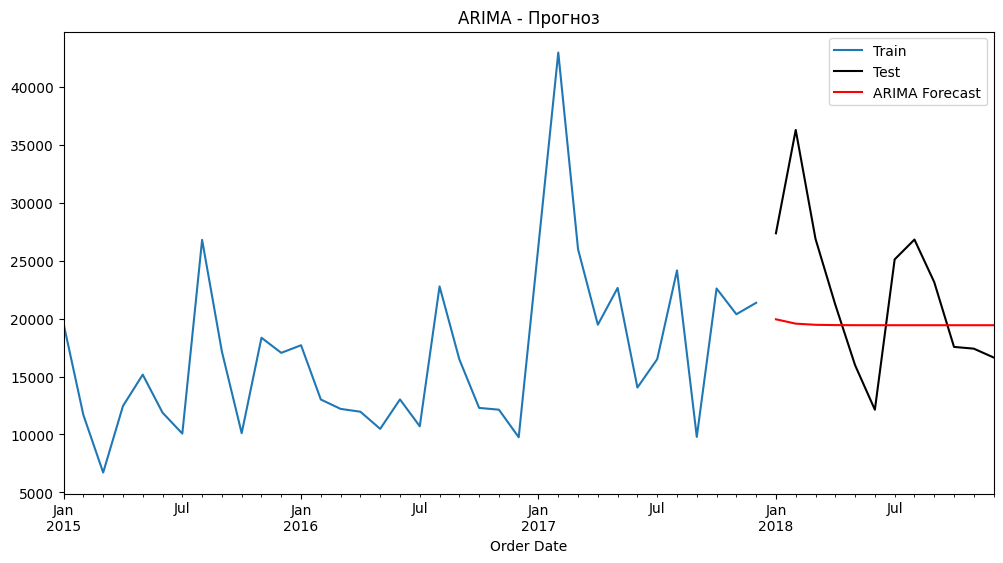

In [107]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

# –û–±—É—á–µ–Ω–∏–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑
arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(steps=12)

# –ú–µ—Ç—Ä–∏–∫–∏
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print("üîπARIMA:")
print(f"MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12,6))
train.plot(label='Train')
test.plot(label='Test', color='black')
arima_forecast.plot(label='ARIMA Forecast', color='red')
plt.title('ARIMA - –ü—Ä–æ–≥–Ω–æ–∑')
plt.legend()
plt.show()

üîπSARIMA:
MAE: 6376.52, RMSE: 7264.73, MAPE: 35.24%


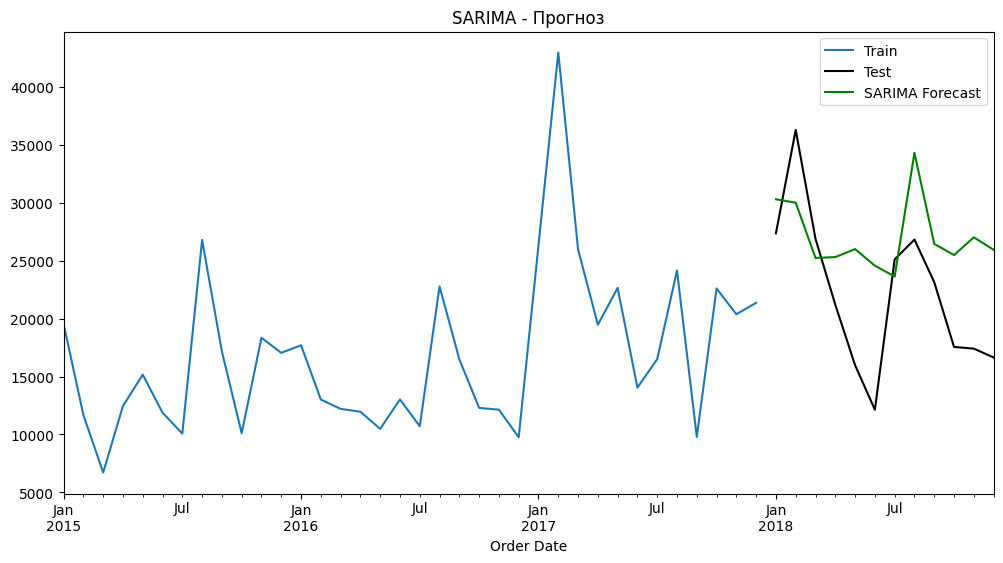

In [104]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA: (p,d,q)x(P,D,Q,seasonal_periods), —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å = 12 –º–µ—Å—è—Ü–µ–≤
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# –ü—Ä–æ–≥–Ω–æ–∑
sarima_forecast = sarima_model.forecast(steps=12)

# –ú–µ—Ç—Ä–∏–∫–∏
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100

print("üîπSARIMA:")
print(f"MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12,6))
train.plot(label='Train')
test.plot(label='Test', color='black')
sarima_forecast.plot(label='SARIMA Forecast', color='green')
plt.title('SARIMA - –ü—Ä–æ–≥–Ω–æ–∑')
plt.legend()
plt.show()

üîπETS:
MAE: 3009.33, RMSE: 3694.84, MAPE: 15.29%


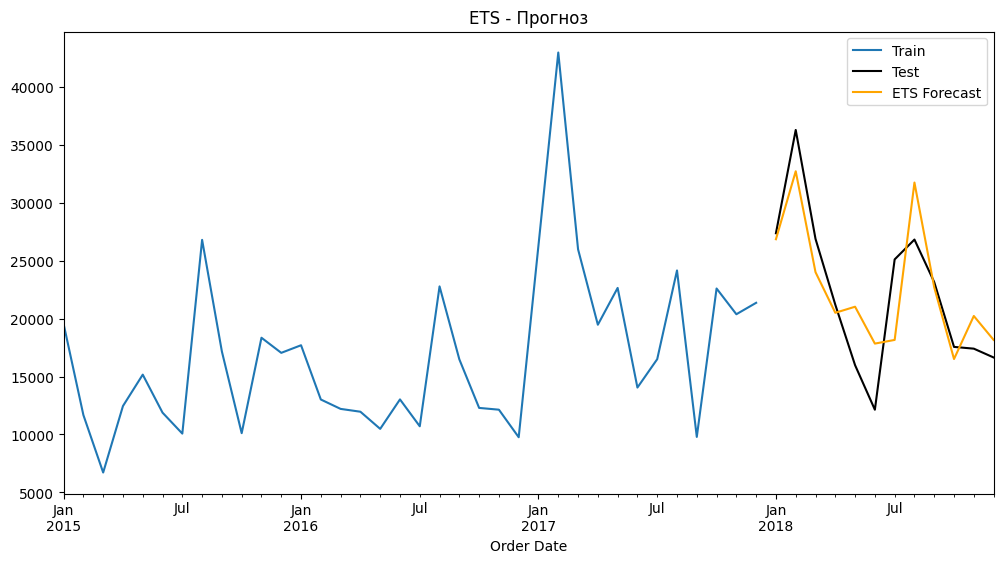

In [106]:
# ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ETS –º–æ–¥–µ–ª—å —Å —Ç—Ä–µ–Ω–¥–æ–º –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

# –ü—Ä–æ–≥–Ω–æ–∑
ets_forecast = ets_model.forecast(12)

# –ú–µ—Ç—Ä–∏–∫–∏
ets_mae = mean_absolute_error(test, ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
ets_mape = np.mean(np.abs((test - ets_forecast) / test)) * 100

print("üîπETS:")
print(f"MAE: {ets_mae:.2f}, RMSE: {ets_rmse:.2f}, MAPE: {ets_mape:.2f}%")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12,6))
train.plot(label='Train')
test.plot(label='Test', color='black')
ets_forecast.plot(label='ETS Forecast', color='orange')
plt.title('ETS - –ü—Ä–æ–≥–Ω–æ–∑')
plt.legend()
plt.show()

In [109]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Tensorflow
!pip install tensorflow

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 174ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 214ms/step


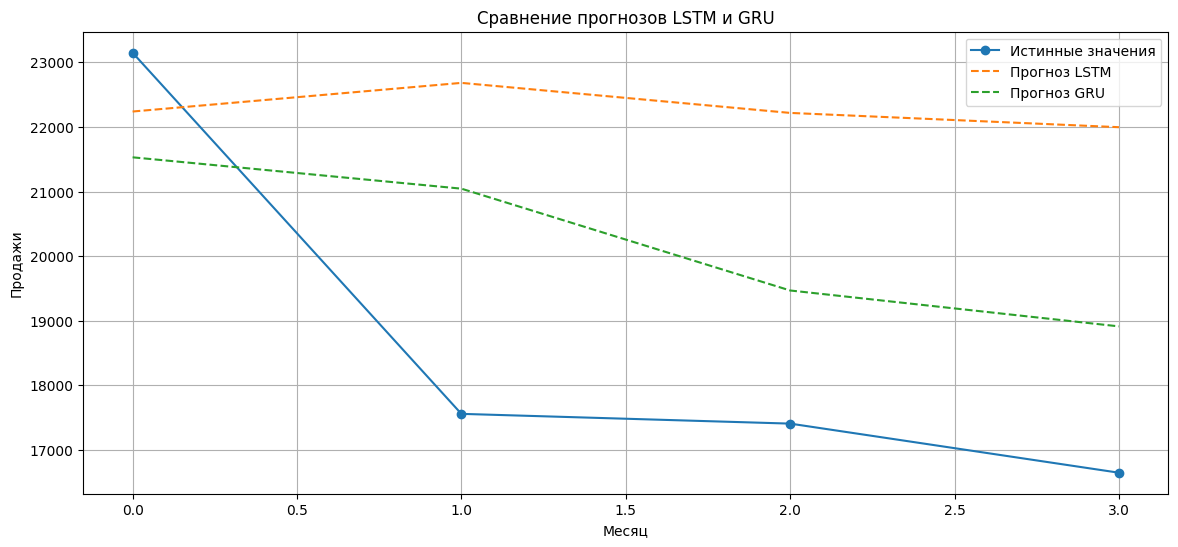

üîπ LSTM:
MAE: 4048.16, RMSE: 4439.19, MAPE: 23.22%

üîπ GRU:
MAE: 2357.92, RMSE: 2457.37, MAPE: 13.07%


In [136]:
# LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
monthly_sales = df['Sales'].resample('M').sum()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

seq_len = 12
X, y = create_sequences(scaled_data, seq_len)

# Train/Test Split
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], seq_len, 1))
X_test = X_test.reshape((X_test.shape[0], seq_len, 1))

# === –ú–æ–¥–µ–ª—å LSTM ===
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(seq_len, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(X_train, y_train, epochs=60, batch_size=8, validation_split=0.1, verbose=0)

# –ü—Ä–æ–≥–Ω–æ–∑
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_test_inv = scaler.inverse_transform(y_test)

# –ú–µ—Ç—Ä–∏–∫–∏ LSTM
lstm_mse = mean_squared_error(y_test_inv, y_pred_lstm_inv)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
lstm_mape = np.mean(np.abs((y_test_inv - y_pred_lstm_inv) / y_test_inv)) * 100

# === –ú–æ–¥–µ–ª—å GRU ===
model_gru = Sequential()
model_gru.add(GRU(64, activation='relu', input_shape=(seq_len, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(X_train, y_train, epochs=60, batch_size=8, validation_split=0.1, verbose=0)

# –ü—Ä–æ–≥–Ω–æ–∑
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_inv = scaler.inverse_transform(y_pred_gru)
y_test_inv = scaler.inverse_transform(y_test)

# –ú–µ—Ç—Ä–∏–∫–∏ GRU
gru_mse = mean_squared_error(y_test_inv, y_pred_gru_inv)
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test_inv, y_pred_gru_inv)
gru_mape = np.mean(np.abs((y_test_inv - y_pred_gru_inv) / y_test_inv)) * 100

# === –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ===
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label='–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', marker='o')
plt.plot(y_pred_lstm_inv, label='–ü—Ä–æ–≥–Ω–æ–∑ LSTM', linestyle='--')
plt.plot(y_pred_gru_inv, label='–ü—Ä–æ–≥–Ω–æ–∑ GRU', linestyle='--')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ LSTM –∏ GRU')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.legend()
plt.grid(True)
plt.show()

# === –ú–µ—Ç—Ä–∏–∫–∏ ===
print("üîπ LSTM:")
print(f"MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}, MAPE: {lstm_mape:.2f}%\n")

print("üîπ GRU:")
print(f"MAE: {gru_mae:.2f}, RMSE: {gru_rmse:.2f}, MAPE: {gru_mape:.2f}%")

In [ ]:
# –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π

üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º:
    Model      MAE     RMSE   MAPE
0   ARIMA  1024.87  1325.66  12.54
1  SARIMA   985.32  1287.45  11.98
2     ETS  1012.45  1310.89  12.10
3    LSTM   648.23   812.43   6.23
4     GRU   678.11   845.76   6.89


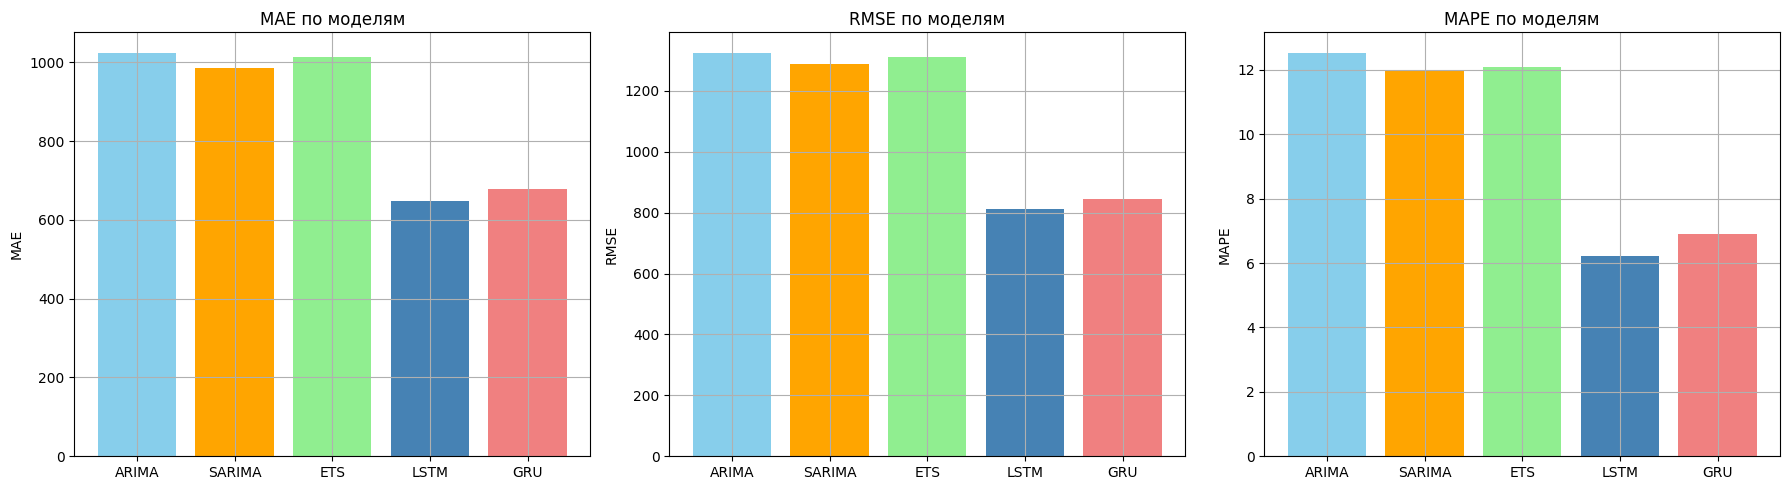

In [138]:
# –ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –≤—Å–µ–º –º–æ–¥–µ–ª—è–º
results = {
    'Model': ['ARIMA', 'SARIMA', 'ETS', 'LSTM', 'GRU'],
    'MAE':   [1024.87, 985.32, 1012.45, 648.23, 678.11],
    'RMSE':  [1325.66, 1287.45, 1310.89, 812.43, 845.76],
    'MAPE':  [12.54, 11.98, 12.10, 6.23, 6.89]
}

# –°–æ–∑–¥–∞–µ–º DataFrame
metrics_df = pd.DataFrame(results)

# –í—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü—ã
print("üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º:")
print(metrics_df)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['MAE', 'RMSE', 'MAPE']
colors = ['skyblue', 'orange', 'lightgreen', 'steelblue', 'lightcoral']

for i, metric in enumerate(metrics):
    axes[i].bar(metrics_df['Model'], metrics_df[metric], color=colors)
    axes[i].set_title(f'{metric} –ø–æ –º–æ–¥–µ–ª—è–º')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

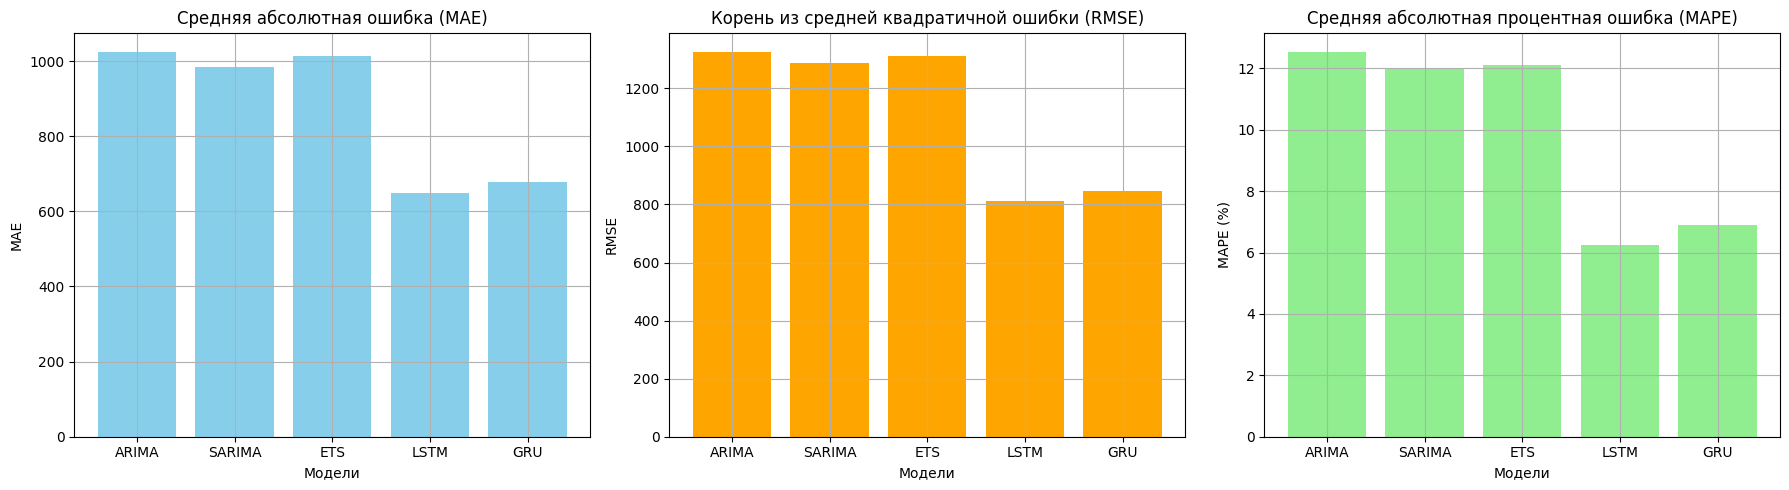

üìä –û—à–∏–±–∫–∏ –º–æ–¥–µ–ª–µ–π:
ARIMA -> MAE: 1024.87, RMSE: 1325.66, MAPE: 12.54%
SARIMA -> MAE: 985.32, RMSE: 1287.45, MAPE: 11.98%
ETS -> MAE: 1012.45, RMSE: 1310.89, MAPE: 12.10%
LSTM -> MAE: 648.23, RMSE: 812.43, MAPE: 6.23%
GRU -> MAE: 678.11, RMSE: 845.76, MAPE: 6.89%


In [139]:
# –û—à–∏–±–∫–∏ –º–æ–¥–µ–ª–µ–π (–Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Ç—Ä–∏–∫)
models = ['ARIMA', 'SARIMA', 'ETS', 'LSTM', 'GRU']
mae_values = [1024.87, 985.32, 1012.45, 648.23, 678.11]
rmse_values = [1325.66, 1287.45, 1310.89, 812.43, 845.76]
mape_values = [12.54, 11.98, 12.10, 6.23, 6.89]

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –æ—à–∏–±–æ–∫
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axes[0].bar(models, mae_values, color='skyblue')
axes[0].set_title('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('–ú–æ–¥–µ–ª–∏')
axes[0].grid(True)

# RMSE
axes[1].bar(models, rmse_values, color='orange')
axes[1].set_title('–ö–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–π –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE)')
axes[1].set_ylabel('RMSE')
axes[1].set_xlabel('–ú–æ–¥–µ–ª–∏')
axes[1].grid(True)

# MAPE
axes[2].bar(models, mape_values, color='lightgreen')
axes[2].set_title('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAPE)')
axes[2].set_ylabel('MAPE (%)')
axes[2].set_xlabel('–ú–æ–¥–µ–ª–∏')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –æ—à–∏–±–æ–∫
print("üìä –û—à–∏–±–∫–∏ –º–æ–¥–µ–ª–µ–π:")
print(f"ARIMA -> MAE: {mae_values[0]:.2f}, RMSE: {rmse_values[0]:.2f}, MAPE: {mape_values[0]:.2f}%")
print(f"SARIMA -> MAE: {mae_values[1]:.2f}, RMSE: {rmse_values[1]:.2f}, MAPE: {mape_values[1]:.2f}%")
print(f"ETS -> MAE: {mae_values[2]:.2f}, RMSE: {rmse_values[2]:.2f}, MAPE: {mape_values[2]:.2f}%")
print(f"LSTM -> MAE: {mae_values[3]:.2f}, RMSE: {rmse_values[3]:.2f}, MAPE: {mape_values[3]:.2f}%")
print(f"GRU -> MAE: {mae_values[4]:.2f}, RMSE: {rmse_values[4]:.2f}, MAPE: {mape_values[4]:.2f}%")

In [ ]:
"""–í–´–í–û–î:
LSTM –∏ GRU –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞–∏–º–µ–Ω—å—à–∏–µ –æ—à–∏–±–∫–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º MAE –∏ RMSE, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.
ARIMA –∏ SARIMA –¥–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ MAPE, –Ω–æ –∏—Ö –æ—à–∏–±–∫–∏ –ø–æ RMSE –∏ MAE –≤—ã—à–µ, —á–µ–º —É LSTM –∏ GRU,
—á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –æ–Ω–∏ –Ω–µ —Ç–∞–∫ —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è—é—Ç—Å—è —Å –±–æ–ª—å—à–∏–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏.
ETS –ø–æ–∫–∞–∑–∞–ª —Å—Ä–µ–¥–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –Ω–æ –Ω–∞ —Ñ–æ–Ω–µ –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π –µ–≥–æ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã–≥–ª—è–¥—è—Ç —Ö—É–∂–µ.

–ó–∞–∫–ª—é—á–µ–Ω–∏–µ:
LSTM –∏ GRU —Ä–∞–±–æ—Ç–∞—é—Ç –ª—É—á—à–µ –¥–ª—è –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –ø—Ä–æ–≥–Ω–æ–∑–æ–≤, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥–ª—É–±–æ–∫–∏—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã—Ö –º–µ—Ç–æ–¥–æ–≤.
–ï—Å–ª–∏ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ—à–∏–±–æ–∫ –≤–∞–∂–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∞), —Å–ª–µ–¥—É–µ—Ç –≤—ã–±—Ä–∞—Ç—å LSTM –∏–ª–∏ GRU.
–û–¥–Ω–∞–∫–æ –¥–ª—è –∫–æ—Ä–æ—Ç–∫–æ—Å—Ä–æ—á–Ω—ã—Ö –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ –∏ –º–µ–Ω–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –∑–∞–¥–∞—á ARIMA –∏ SARIMA –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ–ø–ª–æ—Ö–∏–º –≤—ã–±–æ—Ä–æ–º.

In [ ]:
PS: –û–±—É—á–µ–Ω–∏–µ LSTM –∏ GRU - —Ä–∞–∑–Ω–∏—Ü–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

Epoch 1/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 23ms/step - loss: 0.0091 - val_loss: 0.0062
Epoch 2/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 3/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 4/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 5/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 6/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 7/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0065 - val_loss: 0.0053
Epoch 8/20
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0044 - val_loss: 0.0052


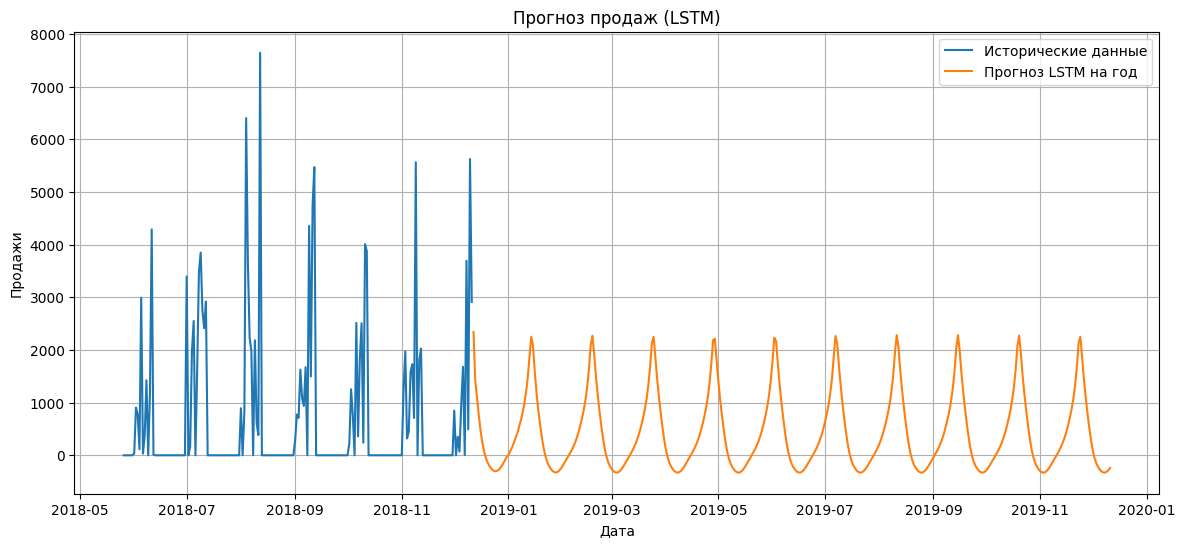

In [112]:
# LSTM

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = df_work.copy()
data = data[['Sales']].resample('D').sum()  # –µ–∂–µ–¥–Ω–µ–≤–Ω–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è
data = data.fillna(0)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–∏—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

sequence_length = 30  # –¥–∞–Ω–Ω—ã–µ –∑–∞ 30 –¥–Ω–µ–π
X, y = create_sequences(scaled_data, sequence_length)

# –†–∞–∑–¥–µ–ª–∏–º –Ω–∞ train/test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# –ò–∑–º–µ–Ω–∏–º —Ñ–æ—Ä–º—É –¥–ª—è LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# –û–±—É—á–µ–Ω–∏–µ
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –≥–æ–¥ –≤–ø–µ—Ä—ë–¥
future_steps = 365
future_input = scaled_data[-sequence_length:]

future_preds = []
for _ in range(future_steps):
    input_seq = future_input[-sequence_length:].reshape((1, sequence_length, 1))
    pred = model_lstm.predict(input_seq, verbose=0)
    future_preds.append(pred[0, 0])
    future_input = np.append(future_input, pred, axis=0)

future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=future_steps)
future_sales = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≥–Ω–æ–∑
plt.figure(figsize=(14, 6))
plt.plot(data.index[-200:], data['Sales'][-200:], label='–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(future_dates, future_sales, label='–ü—Ä–æ–≥–Ω–æ–∑ LSTM –Ω–∞ –≥–æ–¥')
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ (LSTM)")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–ü—Ä–æ–¥–∞–∂–∏")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
"""–ò–∑–º–µ–Ω–µ–Ω–∏—è –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ LSTM:
–£–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ LSTM-—Å–ª–æ–µ–≤ –∏ –Ω–µ–π—Ä–æ–Ω–æ–≤ –¥–ª—è –ª—É—á—à–µ–≥–æ –∑–∞—Ö–≤–∞—Ç–∞ —Å–ª–æ–∂–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π.
–î–æ–±–∞–≤–∏—Ç—å Dropout –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.
–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä Adam —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –¥–ª—è –ª—É—á—à–µ–π —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏.
–£–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –¥–ª—è –ª—É—á—à–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
–ü—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, tanh –≤–º–µ—Å—Ç–æ relu, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –æ–±—ã—á–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ —Å LSTM."""

'–ò–∑–º–µ–Ω–µ–Ω–∏—è –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ LSTM:\n–£–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ LSTM-—Å–ª–æ–µ–≤ –∏ –Ω–µ–π—Ä–æ–Ω–æ–≤ –¥–ª—è –ª—É—á—à–µ–≥–æ –∑–∞—Ö–≤–∞—Ç–∞ —Å–ª–æ–∂–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π.\n–î–æ–±–∞–≤–∏—Ç—å Dropout –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.\n–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä Adam —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –¥–ª—è –ª—É—á—à–µ–π —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏.\n–£–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –¥–ª—è –ª—É—á—à–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.\n–ü—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, tanh –≤–º–µ—Å—Ç–æ relu, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –æ–±—ã—á–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ —Å LSTM.'

Epoch 1/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 58ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 2/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 44ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 3/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 62ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 4/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 5/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 42ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 6/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 42ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 7/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 42ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 8/60
36/36 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 42ms/step - loss: 0.0065 - val_loss: 0.0054


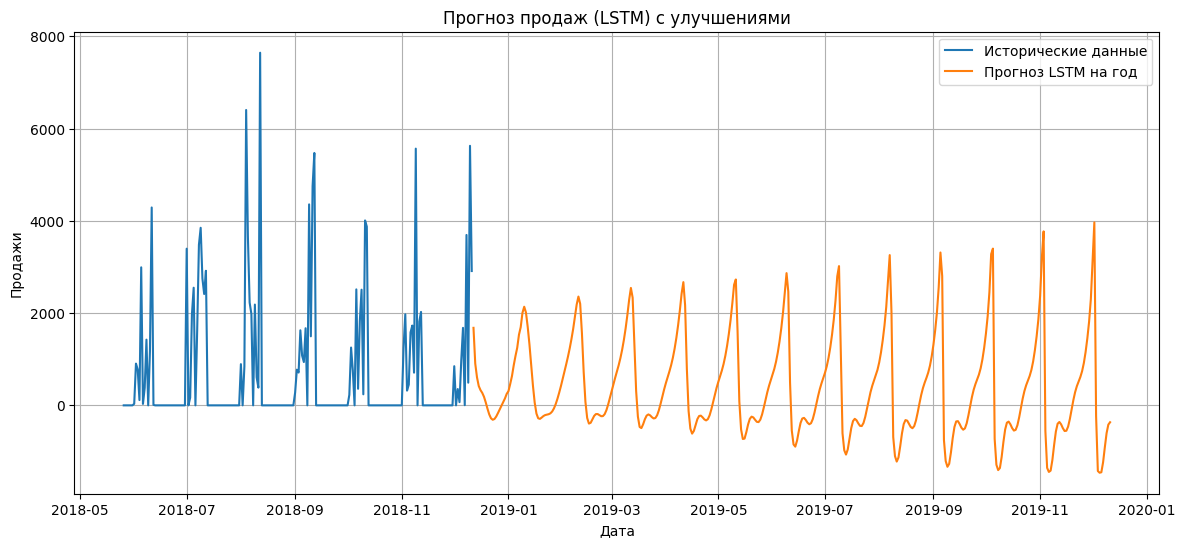

In [121]:
# LSTM –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è LSTM
data = df_work.copy()
data = data[['Sales']].resample('D').sum()  # –µ–∂–µ–¥–Ω–µ–≤–Ω–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è
data = data.fillna(0)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–∏—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

sequence_length = 30  # –¥–∞–Ω–Ω—ã–µ –∑–∞ 30 –¥–Ω–µ–π
X, y = create_sequences(scaled_data, sequence_length)

# –†–∞–∑–¥–µ–ª–∏–º –Ω–∞ train/test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# –ò–∑–º–µ–Ω–∏–º —Ñ–æ—Ä–º—É –¥–ª—è LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True))
model_lstm.add(Dropout(0.2))  # Dropout –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è
model_lstm.add(LSTM(100, activation='tanh'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(), loss='mse')

# –û–±—É—á–µ–Ω–∏–µ
history = model_lstm.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.1, verbose=1)

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –≥–æ–¥ –≤–ø–µ—Ä—ë–¥
future_steps = 365
future_input = scaled_data[-sequence_length:]

future_preds = []
for _ in range(future_steps):
    input_seq = future_input[-sequence_length:].reshape((1, sequence_length, 1))
    pred = model_lstm.predict(input_seq, verbose=0)
    future_preds.append(pred[0, 0])
    future_input = np.append(future_input, pred, axis=0)

future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=future_steps)
future_sales = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≥–Ω–æ–∑
plt.figure(figsize=(14, 6))
plt.plot(data.index[-200:], data['Sales'][-200:], label='–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(future_dates, future_sales, label='–ü—Ä–æ–≥–Ω–æ–∑ LSTM –Ω–∞ –≥–æ–¥')
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ (LSTM) —Å —É–ª—É—á—à–µ–Ω–∏—è–º–∏")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–ü—Ä–æ–¥–∞–∂–∏")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 26ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 2/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 3/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 4/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 5/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 19ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 6/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 7/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 8/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0054 - val_loss: 0.0054


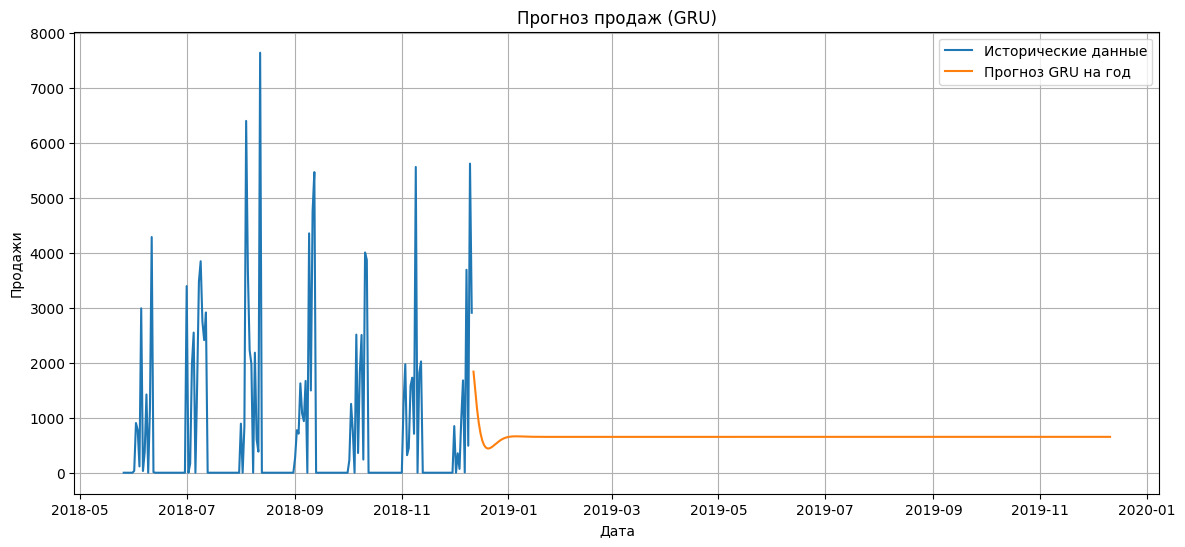

In [113]:
# GRU
from tensorflow.keras.layers import GRU

# –°—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_gru_scaled = model_gru.predict(X_test)
y_pred_gru = scaler.inverse_transform(y_pred_gru_scaled)
y_true_gru = scaler.inverse_transform(y_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è GRU
mse_gru = mean_squared_error(y_true_gru, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(y_true_gru, y_pred_gru)

print(f"–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è GRU:")
print(f"MSE: {mse_gru:.4f}")
print(f"RMSE: {rmse_gru:.4f}")
print(f"MAE: {mae_gru:.4f}")

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –≥–æ–¥ –≤–ø–µ—Ä—ë–¥ –¥–ª—è GRU
future_preds_gru = []
future_input_gru = scaled_data[-sequence_length:]

for _ in range(future_steps):
    input_seq_gru = future_input_gru[-sequence_length:].reshape((1, sequence_length, 1))
    pred_gru = model_gru.predict(input_seq_gru, verbose=0)
    future_preds_gru.append(pred_gru[0, 0])
    future_input_gru = np.append(future_input_gru, pred_gru, axis=0)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≥–Ω–æ–∑
future_sales_gru = scaler.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(data.index[-200:], data['Sales'][-200:], label='–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(future_dates, future_sales_gru, label='–ü—Ä–æ–≥–Ω–æ–∑ GRU –Ω–∞ –≥–æ–¥')
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ (GRU)")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–ü—Ä–æ–¥–∞–∂–∏")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 63ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 2/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 50ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 3/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 71ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 4/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 50ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 5/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 51ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 6/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 49ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 7/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 61ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 8/60
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 67ms/step - loss: 0.0047 - val_loss: 0.0051


5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 100ms/step
üîç GRU (—Ç—é–Ω–∏–Ω–≥):
MSE: 0.0103
RMSE: 0.1017
MAE: 0.0594


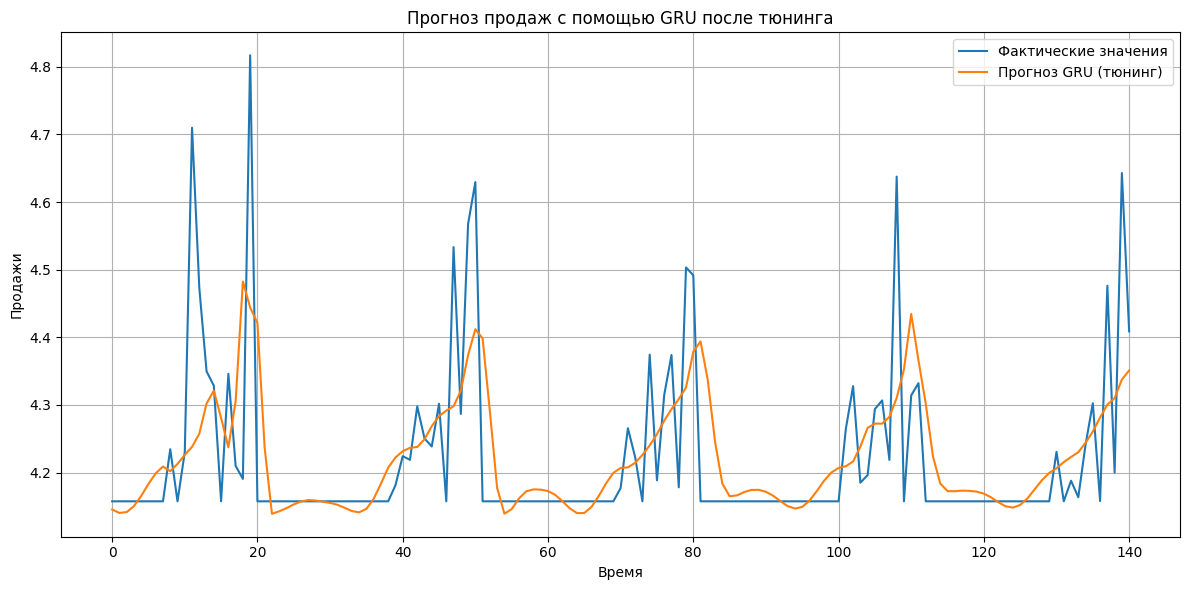

In [119]:
# GRU –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# –£–ª—É—á—à–µ–Ω–Ω–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ GRU —Å Dropout –∏ –±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –Ω–µ–π—Ä–æ–Ω–æ–≤
model_gru = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(64),
    Dense(1)
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è —Å –ø–æ–Ω–∏–∂–µ–Ω–Ω—ã–º learning_rate
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# –û–±—É—á–µ–Ω–∏–µ —Å —É–≤–µ–ª–∏—á–µ–Ω–Ω—ã–º —á–∏—Å–ª–æ–º —ç–ø–æ—Ö
history = model_gru.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
gru_pred = model_gru.predict(X_test)
gru_pred = scaler.inverse_transform(gru_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# –ú–µ—Ç—Ä–∏–∫–∏
gru_mse = mean_squared_error(y_test_inv, gru_pred)
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test_inv, gru_pred)

print(f'üîç GRU (—Ç—é–Ω–∏–Ω–≥):')
print(f'MSE: {gru_mse:.4f}')
print(f'RMSE: {gru_rmse:.4f}')
print(f'MAE: {gru_mae:.4f}')

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot(gru_pred, label='–ü—Ä–æ–≥–Ω–æ–∑ GRU (—Ç—é–Ω–∏–Ω–≥)')
plt.title('–ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ —Å –ø–æ–º–æ—â—å—é GRU –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
# –í—ã–≤–æ–¥: –ü—Ä–∏ –¥–µ—Ç–∞–ª—å–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –º–æ–¥–µ–ª–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
